In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Introduction
In this file I will be exploring agricultural data provided by Lithuanian National Data Agency.
Main goal of this exploration is to find tendencies amongst Lithuanian beekeepers, I am interested in size of average beekeeping farm, and profitability.

In [2]:
farm_df = pd.read_csv("Lietuvos_Respublikos_2020_metu_visuotinio_zemes_ukio_surasymo_duomenys.csv",index_col="objectid")
farm_df.head()

,X,Y,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,u_vld_lytis,f_2000_k,f_2029_k,...,f_106_k,f_109_k,f_108_k,f_2012_k,f_2015_k,standartine_produkcija_k,f_2031_k,f_2019_k,sal_gyv_k,f_2018_k
objectid,,,,,,,,,,,,,,,,,,,,,
1,2.838407e+06,7.235712e+06,0,31,0,32,0,1,0,0,...,0,0,0,10,0,13000,0,0,1,0
2,2.823746e+06,7.247978e+06,0,2,0,2,0,2,0,0,...,0,0,0,0,0,1000,0,0,0,0
3,2.824135e+06,7.248336e+06,0,2,0,2,0,1,0,0,...,0,0,0,0,0,1500,0,20,0,0
4,2.824552e+06,7.248383e+06,0,2,0,2,0,2,0,0,...,0,0,0,0,0,500,0,25,0,0
5,2.836208e+06,7.228047e+06,0,2,0,2,0,2,0,0,...,0,0,0,0,0,500,0,0,0,0


In [3]:
farm_df.drop(["X","Y","u_vld_lytis"],axis = 1,inplace = True)
farm_df = farm_df[~(
    (farm_df['f_2008_k'] == 100) | \
    (farm_df['f_2012_k'] == 100) | \
    (farm_df['f_2015_k'] == 30) | \
    (farm_df['f_2019_k'] == 500) | \
    (farm_df['f_2029_k'] == 100) | \
    (farm_df['f_2031_k'] == 100) | \
    (farm_df['ekonominio_dydzio_klase'] >= 8))]
farm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127450 entries, 1 to 132075
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   f_112_k                   127450 non-null  int64
 1   f_111_k                   127450 non-null  int64
 2   f_113_k                   127450 non-null  int64
 3   f_116_k                   127450 non-null  int64
 4   f_115_k                   127450 non-null  int64
 5   f_2000_k                  127450 non-null  int64
 6   f_2029_k                  127450 non-null  int64
 7   f_2008_k                  127450 non-null  int64
 8   u_eko                     127450 non-null  int64
 9   f_101_k                   127450 non-null  int64
 10  f_100_k                   127450 non-null  int64
 11  f_105_k                   127450 non-null  int64
 12  f_104_k                   127450 non-null  int64
 13  f_1037_k                  127450 non-null  int64
 14  ukininkavimo_kryptis     

Text(0.5, 47.5815972222222, 'correlations')

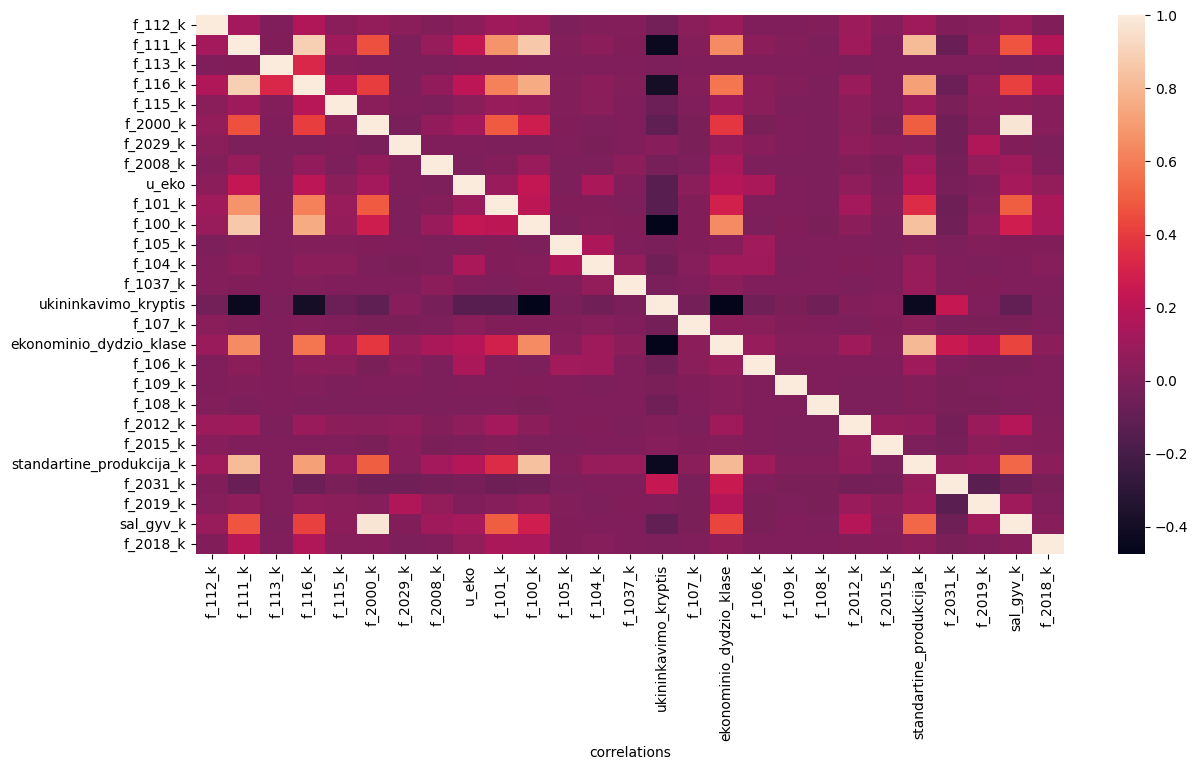

In [4]:
#filtering df to only keep those that actually keep bees and limiting economic class since there are few farms that actually fit the category and it would scew the data
df_filtered = farm_df[(farm_df['f_2031_k'] != 0) & (farm_df['ekonominio_dydzio_klase'] < 11)]

cor_matrix = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(data=cor_matrix, annot=False)
plt.xlabel("correlations")

<AxesSubplot: title={'center': 'Distribution of f_2031_k (bee families) by economic size class'}, xlabel='economic size class', ylabel='f_2031_k'>

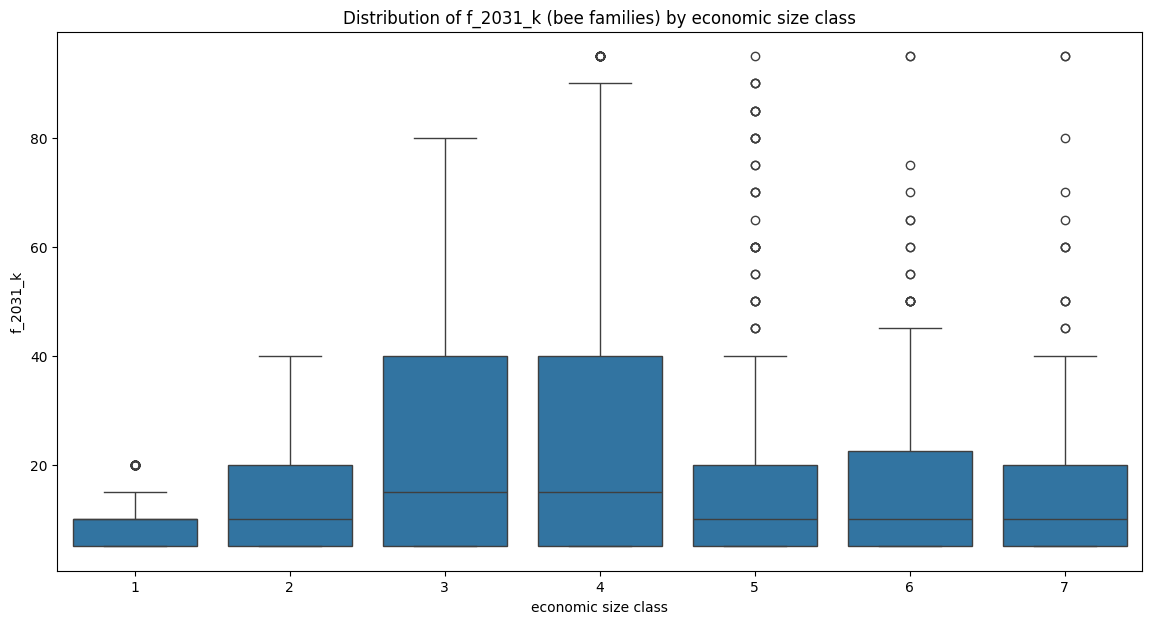

In [5]:
plt.figure(figsize=(14, 7))
plt.title("Distribution of f_2031_k (bee families) by economic size class")
plt.xlabel("economic size class")
sns.boxplot(x='ekonominio_dydzio_klase', y='f_2031_k', data=df_filtered)

At first glance it may look like number of bee families correlate with economic class, up to 5th class, then it drops.
Lets look deeper into economic class distribution amongst beekeeping farms.

In [6]:
farm_df['keeps_bees'] = farm_df['f_2031_k'] > 0
other_sources = ['f_2000_k', 'f_2008_k', 'f_2012_k', 'f_2015_k', 'f_2019_k', 'f_2029_k', 'f_2018_k']
farm_df['bees_major_income'] = farm_df['f_2031_k'] > farm_df[other_sources].max(axis=1)
farm_df.head()

,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,f_2000_k,f_2029_k,f_2008_k,u_eko,f_101_k,...,f_108_k,f_2012_k,f_2015_k,standartine_produkcija_k,f_2031_k,f_2019_k,sal_gyv_k,f_2018_k,keeps_bees,bees_major_income
objectid,,,,,,,,,,,,,,,,,,,,,
1,0,31,0,32,0,0,0,0,0,2,...,0,10,0,13000,0,0,1,0,False,False
2,0,2,0,2,0,0,0,0,0,1,...,0,0,0,1000,0,0,0,0,False,False
3,0,2,0,2,0,0,0,0,0,1,...,0,0,0,1500,0,20,0,0,False,False
4,0,2,0,2,0,0,0,0,0,2,...,0,0,0,500,0,25,0,0,False,False
5,0,2,0,2,0,0,0,0,0,1,...,0,0,0,500,0,0,0,0,False,False


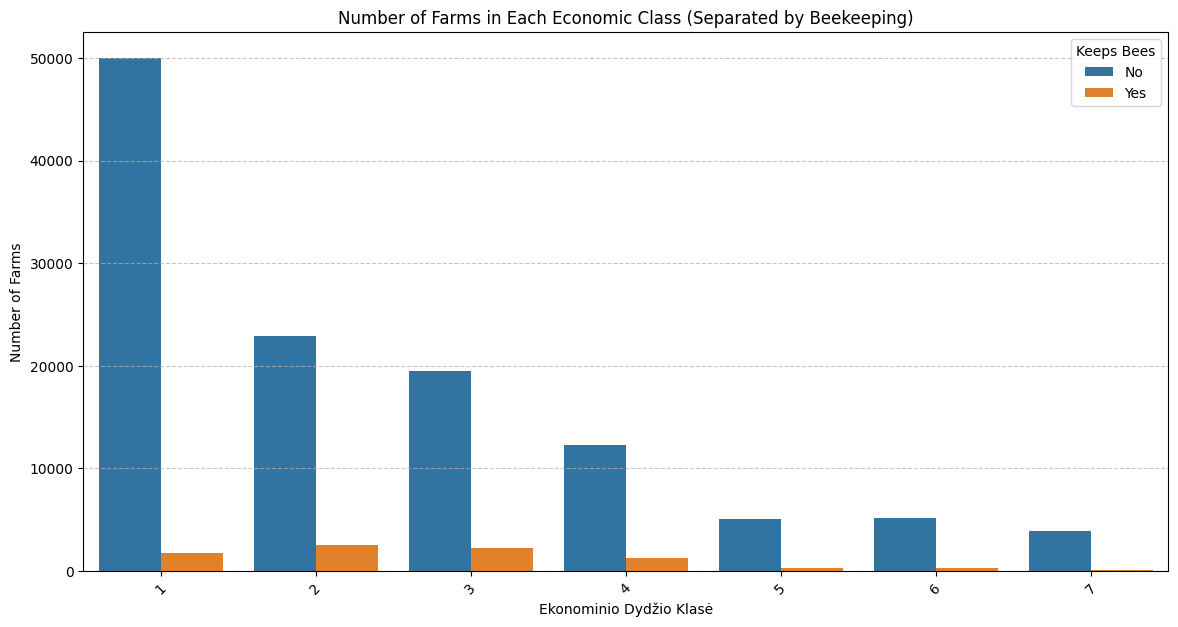

In [7]:
farm_counts = farm_df.groupby(['ekonominio_dydzio_klase', 'keeps_bees']).size().reset_index(name='count')
plt.figure(figsize=(14, 7))

barplot = sns.barplot(x='ekonominio_dydzio_klase', y='count', hue='keeps_bees', data=farm_counts)
plt.title("Number of Farms in Each Economic Class (Separated by Beekeeping)")
plt.xlabel("Ekonominio Dydžio Klasė")
plt.ylabel("Number of Farms")
handles, _ = barplot.get_legend_handles_labels()
plt.legend(handles=handles, title="Keeps Bees", labels=["No", "Yes"])
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

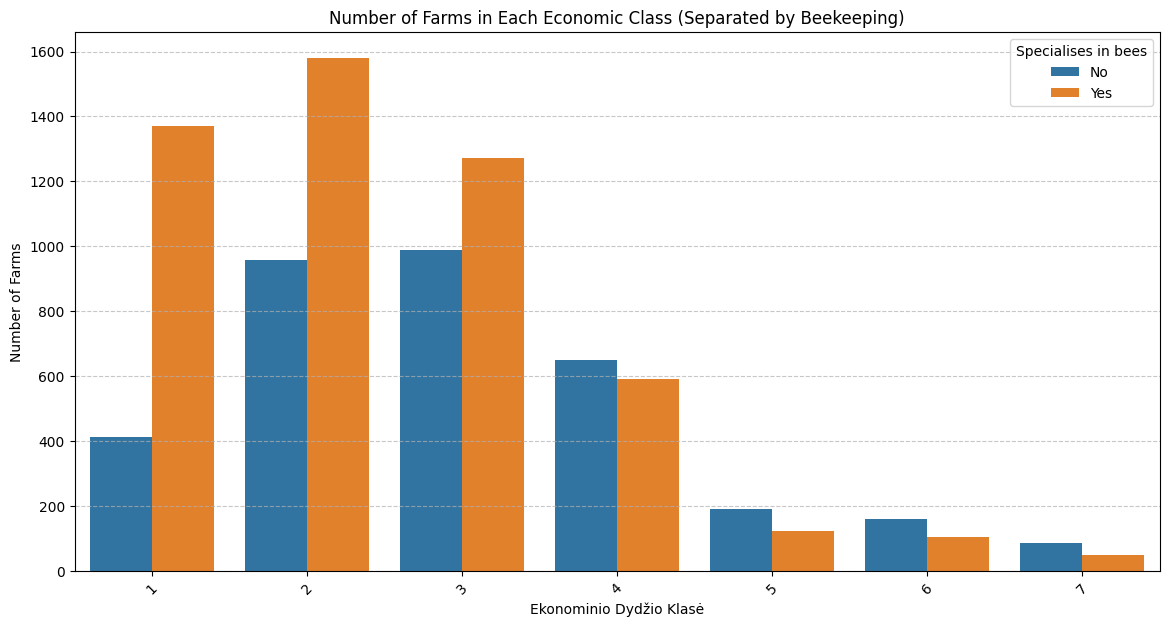

In [8]:
beekeeper_df = farm_df[(farm_df['keeps_bees'] == True) & (farm_df['ekonominio_dydzio_klase'] < 11)]
farm_counts = beekeeper_df.groupby(['ekonominio_dydzio_klase', 'bees_major_income']).size().reset_index(name='count')
plt.figure(figsize=(14, 7))

barplot = sns.barplot(x='ekonominio_dydzio_klase', y='count', hue='bees_major_income', data=farm_counts)
plt.title("Number of Farms in Each Economic Class (Separated by Beekeeping)")
plt.xlabel("Ekonominio Dydžio Klasė")
plt.ylabel("Number of Farms")
handles, _ = barplot.get_legend_handles_labels()
plt.legend(handles=handles, title="Specialises in bees", labels=["No", "Yes"])
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

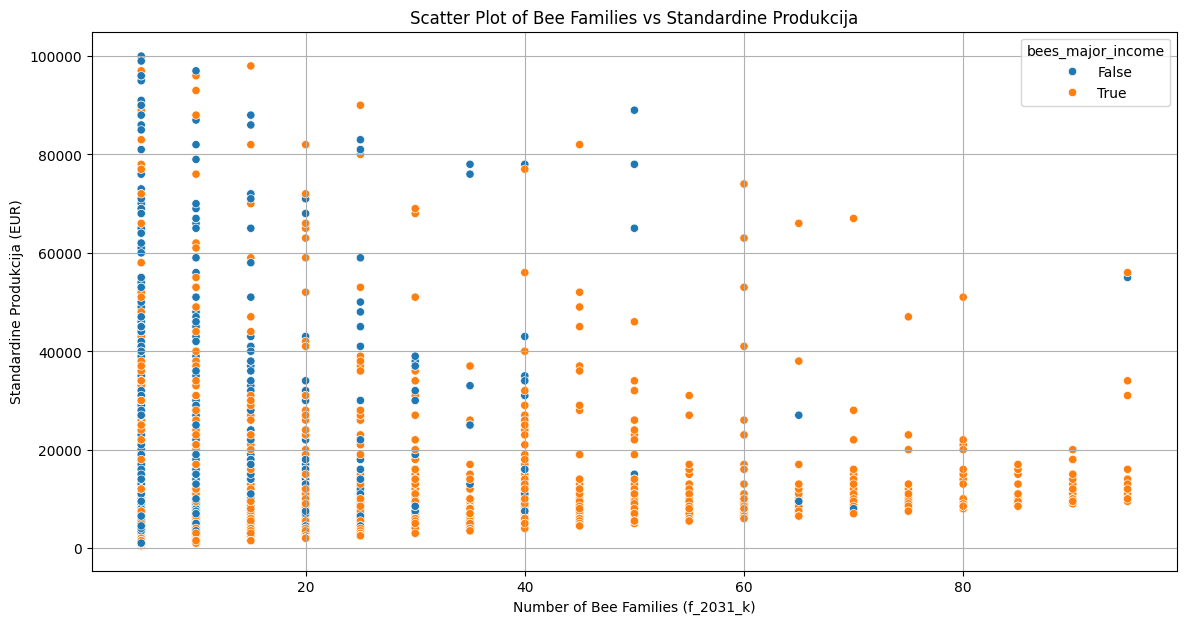

In [9]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=beekeeper_df['f_2031_k'], y=beekeeper_df['standartine_produkcija_k'], hue=beekeeper_df['bees_major_income'])

plt.title("Scatter Plot of Bee Families vs Standardine Produkcija")
plt.xlabel("Number of Bee Families (f_2031_k)")
plt.ylabel("Standardine Produkcija (EUR)")
plt.grid(True)


In [10]:
beekeeper_df[(beekeeper_df["bees_major_income"] == True) & (beekeeper_df["standartine_produkcija_k"]> 90000)]

,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,f_2000_k,f_2029_k,f_2008_k,u_eko,f_101_k,...,f_108_k,f_2012_k,f_2015_k,standartine_produkcija_k,f_2031_k,f_2019_k,sal_gyv_k,f_2018_k,keeps_bees,bees_major_income
objectid,,,,,,,,,,,,,,,,,,,,,
68213,0,128,0,128,0,0,0,0,0,8,...,0,0,0,97000,5,0,0,0,True,True
85195,0,160,0,160,1,0,0,0,0,16,...,0,0,0,93000,10,0,0,0,True,True
95160,12,136,0,148,0,0,0,0,0,0,...,0,0,0,98000,15,0,0,0,True,True
108009,0,62,0,62,0,0,0,0,0,6,...,0,0,0,96000,10,0,0,0,True,True
